# Lecture 1: Quantum states

![img](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png) Filippo Miatto (2024) 

---

#### After going through this lecture you will be able to:
1. Describe the mathematical representation of quantum states
2. Use some advanced tensor tools from `numpy`
3. Visualize qubits on the Bloch sphere
4. Reason about wave functions

---
***Summary of Lecture 1:***
_Today we introduce quantum **States**: the first of the three pillars of Quantum Mechanics (States, Transformations and Measurements). Quantum states are unit vectors in a complex vector space (Hilbert space) and they describe how a quantum system "is". As quantum states are vectors, they can be linearly combined to form other valid states, which are referred to in popular accounts of quantum mechanics as "superpositions".
Qubits are the simplest possible quantum systems because their Hilbert space is only 2-dimensional, and therefore their states can be visualized on a sphere called the Bloch sphere. More complex systems have states that are defined on higher-dimensional spaces, even infinite-dimensional spaces (in which case it makes more sense to talk about wavefunctions)._

---

# 0. Introduction
Quantum Mechanics is the theory that describes the most fundamental building blocks of everything. The typical systems that it applies to are atoms, particles, fields etc... and in principle it could apply to much larger systems. The difficulty is that as we scale up the size of the systems described by QM, the number of degrees of freedom involved grows and the complexity of the quantum mechanical description grows exponentially in the number of degrees of freedom. For this reason QM usually focuses on fundamental systems, but there is no theoretical limit to the size of the systems that it applies to. The only limit is our ability to use it at larger scales.

## 1. It's all linear

Quantum Mechanics is based on linear algebra. Whenever you find you're struggling, you should remind yourself that "it's just linear algebra!".

In QM we have three main classes of objects: States, Transformations and Measurements. All of them can be described by vectors, matrices, and/or higher order tensors. So no matter how complicated things may seem, it's all just linear algebra.

In Lecture 1 (this lecture) we will present quantum states, in Lecture 2 we talk about measurements of quantm systems, and in Lecture 3 we will study transformations of quantum systems.

### 1.1 Complex vector spaces
One important aspect of QM is that the vector spaces that we use are complex, i.e. the entries of the vectors are complex numbers. To help with clarity, we can indicate our complex vector space as $\mathbb{C}^n$ where we have fixed its dimension to $n$. We will encounter vector spaces of various dimension. Let's now see a couple of fundamental operations that we will often need in QM: inner products and norms.

First of all, our vector spaces are Hilbert spaces, which means that they come equipped with an inner product:

$$
\langle \mathbf{v}, \mathbf{w}\rangle = \sum_iv_i^*w_i
$$

notice that the vector $\bf v$ is conjugated when computing the inner product, i.e. we flip the sign of the imaginary component. 

Secondly, the inner product can be used to define a norm (that is why all inner product spaces are also normed spaces):

$$
||\mathbf{v}|| = \sqrt{\langle \mathbf{v}, \mathbf{v}\rangle} = \sqrt{\sum_iv_i^*v_i}
$$

### 1.2 Dirac's notation
There is a particular notation that has been adopted by the scientific community, known as Dirac's bra-ket notation. It comes from the alternative way of writing an inner product between two vectors $\mathbf{v}$ and $\mathbf{w}$ as $\langle \mathbf{v}|\mathbf{w}\rangle$. If you interpret it as two objects coming together and "sticking" to each other, you can separate them into $\langle \mathbf{v}|$ and $|\mathbf{w}\rangle$ and use them as row and column vectors (more appropriately as covectors and vectors). We call them "bra" and "ket" because together they sound like the word "bracket". Whatever we write inside the ket (or a bra) is just a label: it's a name for that (co)vector, which sometimes carries useful information about the quantum state that it represents, like when we express the state of electromagnetic vacuum as $|0\rangle$, meaning zero photons.

As the vector space is complex, remember that to turn vectors and covectors into each other you also take the complex conjugate of the elements: $\langle\psi| = |\psi\rangle^\dagger$ where the dagger symbol $\dagger$ computes the "hermitian conjugate" (i.e. the conjugate transpose).

We will make abundant use of inner products and norms. So let's begin our first activity by defining a couple of helper functions to compute inner products and norms.

#### Activity 1: inner products and norms (10 min)
- Write a function $f(\mathbf{v}, \mathbf{w})$ that computes the inner product between two vectors $\mathbf{v}$ and $\mathbf{w}$. The signature should be `f(array[complex], array[complex]) -> complex`
- Write a function $f(\mathbf{v})$ that computes the norm of a vector $\mathbf{v}$. The signature should be `f(array[complex]) -> float`

Note that we are not necessarily seeking optimal performance here, exactness is enough.

In [6]:
import numpy as np

def inner_prod(v, w):
    return np.sum(np.conj(v) * w)

def norm(v):
    return inner_prod(v,v)

### 1.3 A bit of useful numpy

`Numpy` is one of the most popular python libraries for numerical calculus. We want to use it as much as possible, because the functions that you call actually run C code under the hood, which is very fast.

The most useful tool that I want to teach you is the function `np.einsum()`, but before we get there let's learn about tensors and axes. Tensors are generalizations of vectors and matrices. A tensor is an array of numbers, where each number is identifed by a set of coordinates, or indices. 

The meaning that we bestow upon the tensor depends on what we will use it for. Here's a couple examples:

1. A complex tensor with a single index of dimension $n$ can be interpreted as a vector $T \in \mathbb{C}^n$.

2. A complex tensor with two indices of dimension $m$ and $n$ can be interpreted as a matrix, i.e. a map $T : \mathbb{C}^n\rightarrow \mathbb{C}^m$, but also as a vector $T \in \mathbb{C}^n\otimes \mathbb{C}^m$.

A general tensor is simply an object with multiple indices: $T_{ijklmn\dots}$, whose meaning depends on the context.

The number of indices is called the _order_ of the tensor, so column vectors are order-1 tensors, matrices are order-2 tensors etc...

Each index has a dimension (i.e. the number of integer values that it can have), and the dimension does not have to be the same for all the indices of a tensor. If we call $d(j)$ the dimension of the index $j$, then a tensor $T_{j_1,\dots,j_r}$ of order $r$ contains $d(j_1)\times d(j_2)\times\dots\times d(j_r)$ values in it, and so the size of a tensor scales exponentially with the number of indices, i.e. with the order.

`numpy` has many useful pre-baked functions in order to deal with vectors and matrices, but it can also easily deal with higher-order tensors. Here are a few useful functions and methods to know:

- `np.newaxis`: this method allows us to create new indices (of dimension 1) for a tensor
- `Ellipsis` (three dots): this object is a placeholder for any number of indices 
- Broadcasting: this automatic operation allows us to define computations between tensors of "incompatible" shape

In [7]:
# Usage of np.newaxis

v = np.array([1,2,3]) # a vector

v1 = v[:, np.newaxis]
print(f'Adding a second index. New shape of the tensor is {v1.shape}:\n', v1, '\n')

v2 = v[np.newaxis, :]
print(f'Adding a new first index. New shape of the tensor is {v2.shape}:\n', v2, '\n')

v3 = v[:, np.newaxis, np.newaxis]
print(f'Adding a second and third index. New shape of the tensor is {v3.shape}:\n', v3, '\n')

Adding a second index. New shape of the tensor is (3, 1):
 [[1]
 [2]
 [3]] 

Adding a new first index. New shape of the tensor is (1, 3):
 [[1 2 3]] 

Adding a second and third index. New shape of the tensor is (3, 1, 1):
 [[[1]]

 [[2]]

 [[3]]] 



In [8]:
# using new axes for broadcasting

v = np.array([1,2,3])
m = np.ones((3,3)) # a 3x3 matrix

# compare:

print('broadcasting along 1st index (rows):')
print(v[np.newaxis, :] * m, '\n')

print('broadcasting along 2nd index (columns):')
print(v[:, np.newaxis] * m)

broadcasting along 1st index (rows):
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]] 

broadcasting along 2nd index (columns):
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [9]:
# Usage of ellipsis

T = np.zeros((2,3,4,5)) # tensor of shape (2,3,4,5)
T[..., np.newaxis].shape

(2, 3, 4, 5, 1)

### 1.4 `np.einsum()`
Now we can talk about `np.einsum()`, which is an extremely useful function. It can handle all sorts of tensor products, transposition, traces and much more.

It takes as first argument a string that explains what happens to the indices (indicated as letters) and then it takes as many tensors as required by the string. There is only one rule:

$$
\mathbf{Repeated\ indices\ are\ summed\ over}
$$

This means that if we use the same symbol (the same letter) for an index, we mean that in the expression there should be a summation over that index. Let's see a few examples.

#### Matrix multiplication
Matrix multiplication is:

$$
(MN)_{ik} = \sum_j M_{ij}N_{jk} =: M_{ij}N_{jk}
$$

In the last step we use what is called "Einstein's summation convention", where we omit writing the summation symbol $\sum_j$, because $j$ is repeated (it appears in both $M$ and $N$) and therefore it's being summed over. When we sum over a repeated index we say that we _contract that index_.

With `np.einsum` this would be:

```python
np.einsum('ij,jk -> ik', M, N)
```

Matrix multiplication between, say, 4 matrices is
$$
(MNPQ)_{im} = \sum_{jkl} M_{ij}N_{jk}P_{kl}Q_{lm} \equiv M_{ij}N_{jk}P_{kl}Q_{lm}
$$
With `np.einsum` this would be:

```python
np.einsum('ij,jk,kl,lm -> im', M, N, P, Q)
```

#### Higher order contractions
This can obviously work for tensors of any order! Here's a silly example that does not mean anything:

$$
T_{m} = \sum_{jkl} M_{j}N_{jklm}P_{jk}Q_{l} \equiv M_{j}N_{jklm}P_{jk}Q_{l}
$$

(note that $m$ is the only index here which is never repeated, so the final result must be a vector indexed by $m$)

With `np.einsum` this would be:

```python
np.einsum('j,jklm,jk,l -> m', M, N, P, Q)
```

#### Transposition
The string after the arrow allows us to do some final rearranging of the indices, like a transposition:

$$
(MN)^T = (\sum_{j} M_{ij}N_{jk})^T \equiv (M_{ij}N_{jk})^T
$$
With `np.einsum` this would be:

```python
np.einsum('ij,jk -> ki', M, N) # notice: ki and not ik
```

#### Traces
If we repeat an index belonging to the same tensor, we compute a trace:

$$
Tr(M) = \sum_{i} M_{ii} \equiv M_{ii}
$$
With `np.einsum` this would be:

```python
np.einsum('ii', M)
```

#### Tensor products (i.e. outer products)
Outer products are the opposite of inner products, i.e. we simply don't contract indices:

E.g. with vectors:
$$
\mathbf{v}\otimes \mathbf{w} = v_{i}w_{j}
$$
With `np.einsum` this would be:

```python
np.einsum('i,j -> ij', v, w)
```

Or with matrices:
$$
M\otimes N = M_{ij}N_{kl}
$$
With `np.einsum` this would be:

```python
np.einsum('ij,kl -> ijkl', M, N)
```



#### Activity 2: A better Hilbert-Schmidt inner product (10 min)

The Hilbert-Schmidt inner product is an inner product between complex matrices and it is defined as follows:

$$
\langle M, N\rangle = Tr(M^\dagger N)
$$

where $M^\dagger$ means we transpose and complex-conjugate $M$.

- `v1`: implement the formula as is written above, using `np.matmul`, `np.trace` and `np.conj` to compute the conjugate
- `v2`: implement the formula using `np.einsum` and `np.conj`
- `v3` (Bonus): implement the formula in a more efficient way than `v1` without using `np.einsum` (tip: use what you learned from `v2`)

In [10]:
# v1
def HS_inner_product(M, N):
    return np.trace(np.matmul(np.transpose(np.conj(M)), N))

# v2
def HS_inner_product(M, N):
    return np.einsum('ji,ji', np.conj(M), N)

# v3
def HS_inner_product(M, N):
    return np.sum(np.conj(M) * N)

#### Activity 3: A better way to multiply by a diagonal matrix (10 min)

Consider the product between three matrices: $ABC$, where $B$ is a diagonal matrix. This happens all the time when we consider an eigensystem decomposition of a matrix, where the central matrix contains the eigenvalues on the diagonal.

- `v1`: implement this product as is written above (treat $B$ as if it were a regular matrix) using `np.einsum`
- `v2`: implement this product in a more efficient way (use the fact that $B$ is diagonal) using `np.einsum` 
- `v3`: implement this product with `np.einsum` and `np.diag(B)`.

In [ ]:
# v1
def prod(A, B, C):
    return np.einsum('ij,jk,kl -> il', A, B, C) # 3 matrices
# v2
def prod(A, B, C):
    return np.einsum('ij,jj,jl -> il', A, B, C) # B is diagonal
# v3
def prod(A, B, C):
    return np.einsum('ij,j,jl -> il', A, np.diag(B), C) # only using the diagonal of B

## 2. Quantum systems and their properties
Quantum systems are usually very tiny objects (electrons, atoms, photons, etc...). This is because objects behave according to quantum mechanics when they are extremely simple and isolated and as they grow in size we lose track of the degrees of freedom that are needed to describe them quantum mechanically. The state of a quantum system is a mathematical object that allows us to make predictions, such as "what will be the result of this measurement?", or "how will the state change if I apply this transformation?", or "how similar are these systems?" and so on.

### 2.1 Properties $\leftrightarrow$ Hilbert spaces
**Axiom 1: To each independent property of a system we associate a Hilbert space.**

Once we use enough Hilbert spaces to cover all of the properties of a system, we can say that we have a complete description of this system. We describe a property by specifying a vector in the Hilbert space.

NOTE: _Often we will refer to this vector as the state of the system even though we are actually talking about just one of its properties. This is okay as it's also done in everyday language ('the cat is black' is an acceptable sentence to describe a cat even if it doesn't specify its weight, its position, etc...)._

The dimension of a Hilbert space equals the number of _perfectly distinguishable values_ that the property can have. 

NOTE: _This is where we begin noticing a difference between classical physics and quantum physics: in classical physics the values of a property are always distinguishable (i.e. a chair is either here or over there, and we can know where it is by looking at it), but in quantum physics the values of a property may not be always distinguishable from each other. To fully understand this we will need the Born rule (Lecure 2), so for the time being hold on to this thought._

We said that a quantum state is represented by a vector in a Hilbert space. However, not every vector in $\mathbb{C}^n$ is a valid quantum state. Quantum states are only the vectors of norm 1: $|\psi\rangle$ is a quantum state iff $\langle\psi|\psi\rangle = 1$.
For reasons that will become clear in Lecture 2 when we introduce measurements, we can define a set of "perfectly distinguishable" states by using an orthonormal basis on the Hilbert space. For example, we can describe the spin of an electron (which has two perfectly distinguishable values) within the Hilbert space $\mathbb{C}^2$, using the basis $\binom{1}{0}$ and $\binom{0}{1}$ to indicate two distinguishable states such as the spin pointing in two opposite directions.

We will indicate each element of the standard basis in Dirac's notation simply by numbering the kets: $|0\rangle, |1\rangle, |2\rangle, \dots, |n-1\rangle$.

#### Activity 4: normalize vectors and generate the canonical basis elements (10 min):
- Write a function $normalize(\mathbf{v})$ which takes a vector $\mathbf{v}$ and normalizes it. The signature should be `f(array[complex]) -> array[complex]`.
- Write a function $basis(dim, k)$ which returns the $k$-th standard basis element in a Hilbert space of dimension $dim$. The signature should be `f(int, int) -> array[complex]`.

In [11]:
def normalize(v):
    return v/np.linalg.norm(v)

def basis(dim, k):
    z = np.zeros(dim, dtype=np.complex64)
    z[k] = 1.0 + 0.0j
    return z

def basis(dim, k): # alternative, but not as efficient
    return np.identity(dim, dtype=np.complex64)[k] 

### 2.2 State superpositions
A fundamental property of vector spaces is the possibility to take linear superpositions of vectors. This can be also done with quantum states, as they are vectors. This is one of the central features of QM, which definitely sets it apart from classical physics! But what does it mean for the values of a property to be in superposition?

It means that in the quantum world there are many more "_ways of being_" than there are classically. In the classical world a cat is either dead or alive, but in the quantum world it can really be both at the same time, and not just both, there is an infinite number of ways of being both.

The most general state of a property is a linear combination of all the elements associated to the canonical basis:

$$
|\psi\rangle = \sum_{i=0}^{n-1}\psi_i|i\rangle \quad\leftrightarrow \quad(\psi_0, \psi_1,\dots,\psi_{n-1})^T \in \mathbb{C}^n
$$

We call the complex numbers $\psi_i$ the "probabiliy amplitudes" for a reason that will be clear in a moment.

Obviously it must hold that $\langle\psi|\psi\rangle = 1$ otherwise $|\psi\rangle$ would not be state. At the level of amplitudes this implies:

$$
\langle\psi|\psi\rangle = \sum_{i=0}^{n-1}\psi_i^*\psi_i = \sum_{i=0}^{n-1}|\psi_i|^2 = 1
$$

So we can interpret the set of real numbers $\{|\psi_i|^2\}$ as a set of probabilities becasue they sum to 1. This is why the complex values $\psi_i$ are called "probabiliy amplitudes": they are not exactly probabilities, but their squared absolute value is.

There is a deeper reason why we talk about probabilities (not just that we have a bunch of numbers that sum to 1), but this has to wait for Lecture 2, when we will talk about measurements and the probabilities associated to the various outcomes.

Some astute readers may be wondering what would happen if we used a different basis on the vector space. Surely the amplitudes would be different! And they would be correct: the set of amplitudes that characterize a quantum state depends on the basis used, and there is no "right" basis, just more or less convenient ones. We will understand the connection between different basis choices and the corresponding amplitudes once we introduce measurements.

#### Activity 5: state superpositions, random states (10 min)
- Write a function $rand\_state(d)$ that returns a random $d$-dimensional quantum state. The signature should be `rand_state(int) -> array[complex]`
- Write a function $uniform\_rand\_state(d)$ that returns a random $d$-dimensional quantum state with a flat probability distribution (i.e. the absolute value squared of all its amplitudes is constant). The signature should be `f(int) -> array[complex]`

We don't require fair sampling from the Haar measure here, just a utility function to return some random states.

In [12]:
def rand_state(d: int):
    x = np.random.normal(size=d)
    y = np.random.normal(size=d)
    return normalize(x + 1j*y)

def uniform_rand_state(d: int): # a random state with constant probabilities
    phases = np.exp(2*np.pi*1j*np.random.rand(d))
    return normalize(phases)

## 3. Qubits
Qubits are the simplest quantum states possible. They are systems with only a single property (so a single Hilbert space is suffcient to describe them completely) and this property has only two distinguishable values (so the Hilbert space has dimension 2).

A general qubit state is characterized by just two complex amplitudes:

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle \quad \leftrightarrow\quad \binom{\alpha}{\beta}$$

Something that we can do with qubits that is not possible with higher-dimensional states is to visualize them explicitly. Despite depending on two complex numbers (and therefore having 4 real degrees of freedom), the fact that we impose normalization and the fact that the global phase does not matter (we'll prove this in Lecture 2) brings down the number of degrees of freedom from 4 to just 2. Not only that, but the topology of the state space turns out to be equivalent to a sphere (technically, it's the space $\mathbb{C}\mathcal{P}^1$, i.e. the complex projective line, which is isomorphic to a 2-sphere).

So any qubit state corresponds to a point on a sphere, that's convenient! 

In [13]:
from qutip import Bloch, Qobj
b = Bloch()

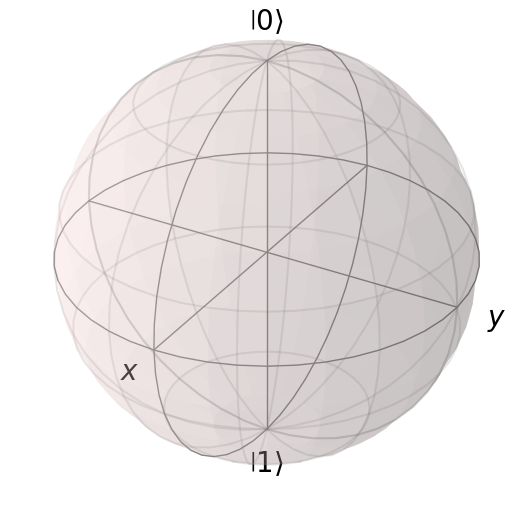

In [14]:
b.show()

In [15]:
b.add_states([Qobj(rand_state(2)) for _ in range(5)])

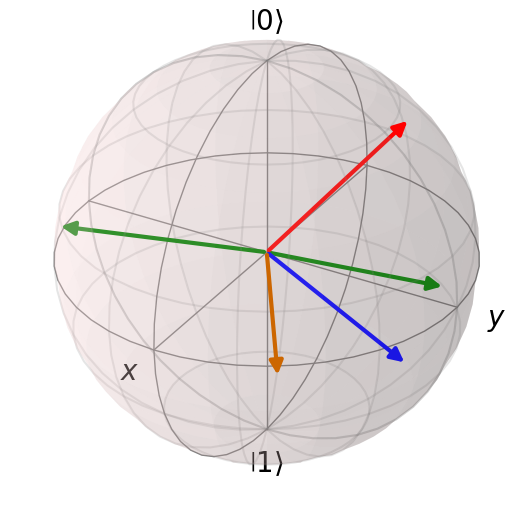

In [16]:
b.show()

In [17]:
b.clear()

#### Activity 6: Visualize the quantum relative phase (10 min)
- Produce a Bloch sphere visualization of a set of qubit states in the form $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{e^{i\phi}}{\sqrt{2}}|1\rangle$ for varying values of the phase $\phi$. All of these states have an equal "amount" of $|0\rangle$ and $|1\rangle$, but their relative phase is different and this phase leads to physically distinct states.
- Using the parametrization $\sin(\theta/2)|0\rangle + e^{i\phi}\cos(\theta/2)|1\rangle$, fill the Bloch sphere with three sets of qubit states that span three large circles on the XY, YZ and ZX planes.

In [18]:
def qubit(theta, phi):
    return Qobj(np.array([np.sin(theta/2), np.exp(1j*phi)*np.cos(theta/2)]))

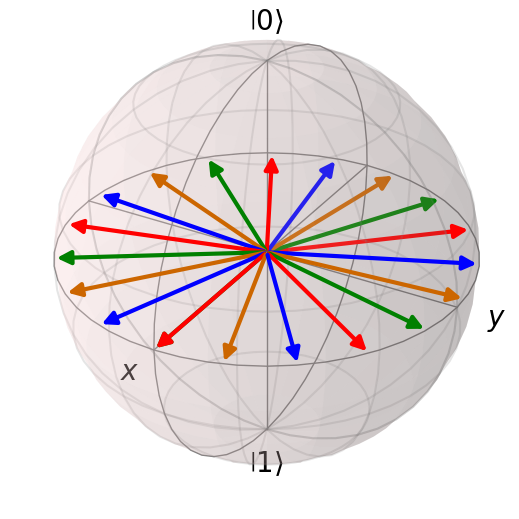

In [19]:
b = Bloch()
b.add_states([qubit(np.pi/2, phi) for phi in np.linspace(0, 2*np.pi, 20)])
b.show()

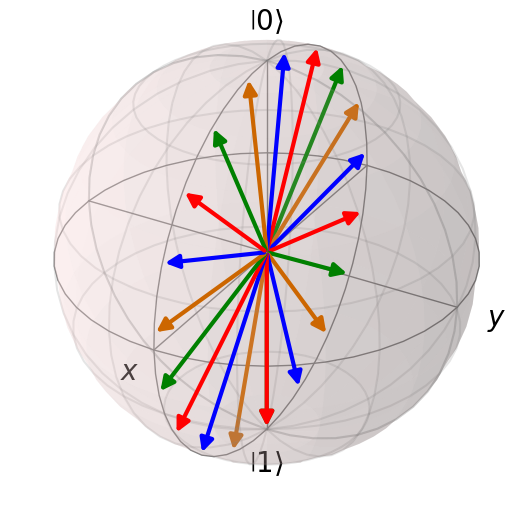

In [20]:
b.clear()
b.add_states([qubit(theta, 0) for theta in np.linspace(0, 2*np.pi, 20)])
b.show()

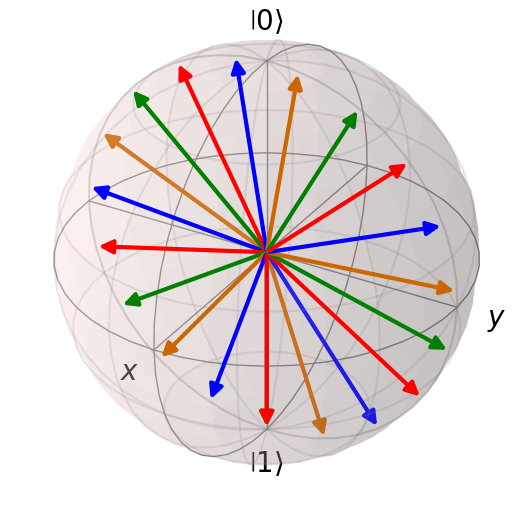

In [21]:
b.clear()
b.add_states([qubit(theta, np.pi/2) for theta in np.linspace(0, 2*np.pi, 20)])
b.show()

# 4. High-dimensional states and wave functions
Some properties have a clearly finite-dimensional space associated to them, such as the spin of an electron which as we saw, is only 2-dimensional. Other properties however, have an actually _continuous_ range of values, such as the position of a particle. In theoretical QM this is treated using infinite-dimensional Hilbert spaces (e.g. $L_2(\mathbb{R})$, the space of mod-square integrable functions). This however is not the best for us because we cannot fit an infinite-dimensional vector space in our computer. There are a couple of ways out of this issue:

1. Discretize the space and things will be okay in the limit for a discretization that is small enough
 - pro: easy
 - con: states that not physically important are treated as fundamental
 
 
2. Use a discrete (still finite) basis of continuous functions
 - pro: physically relevant states are fundamental
 - con: a bit harder to set up

In both cases, we approximate an infinite-dimensional vector space with a finite-dimensional one. The clever way to think about this is that not all quantum states are equally likely/important/useful and so not all finite-dimensional approximations are equally good, even for equal dimensionality. We should pick the one that best suits our needs.

This is where wave functions come in. A wave function is an element of an infinite-dimensional Hilbert space. You can think of it as a continuous version of a vector:

$$
|\psi\rangle = \int_{-\infty}^{\infty}\psi(x)|x\rangle\, dx
$$

The way to think about it is that in the finite dimensional case, the entries of a state vector were indexed by the little index $i$ below each amplitude $\psi_i$, whereas here they are indexed by a continuous index $x$. After all, a function $\psi(x)$ can be thought of as a "vector of values", indexed by a continuous index $x$.

So the inner product in this infinite-dimensional vector space is

$$
\langle\psi|\phi\rangle = \int_{-\infty}^{\infty}\psi(x)^*\phi(x)dx
$$

and therefore the norm is:

$$
\langle\psi|\psi\rangle = \int_{-\infty}^{\infty}\psi(x)^*\psi(x)\,dx = \int_{-\infty}^{\infty}|\psi(x)|^2\,dx
$$

### 4.1 First solution: brute-force discretization
The first solution is equivalent to clipping the space from $(-\infty, \infty)$ to a finite interval, say $[0,L]$ and dividing it into steps of length $\delta x$. Then we obtain a Hilbert space of dimension $L/\delta x$. This is like having a particle in a 1D box of length $L$.

All the states are going to be defined in this Hilbert space. For example, the state of a particle that sits at the origin is $|\psi\rangle=(1,0,0,\dots)$, the particle that sits at position $2\delta x$ is $|\psi\rangle = (0,0,1,0,\dots)$ and so on.

This is the high-dimensional equivalent of the canonical basis.

#### Activity 7: wave function visualization (10 min)
(use the helper function `plot_position()` that you will find in the library of the course)

- Let $L = 100$. Visualize a random state
- Let $L = 10$. Visualize 3 _different_ states where the particle has an equal probability of being at x = 0 and x = 3.
- Let $L = 100$. Visualize a state whose probability distribution is a Gaussian function centered at 50 with std = 5.

In [22]:
import numpy as np
from INFPHY201 import plot_position

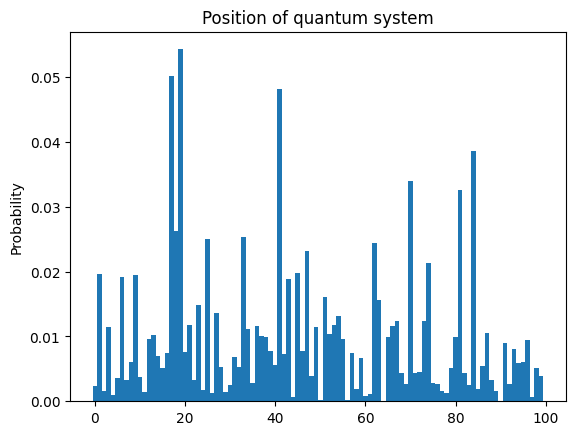

In [23]:
plot_position(rand_state(100))

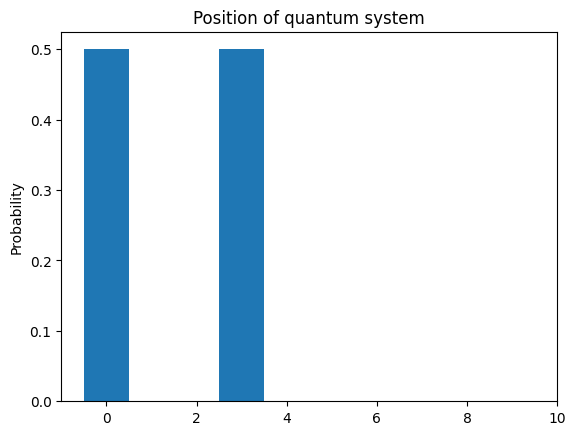

In [25]:
s = np.pi/4

psi = np.array([1/np.sqrt(2),0,0,np.exp(1j*s)*1/np.sqrt(2),0,0,0,0,0,0])

plot_position(psi)

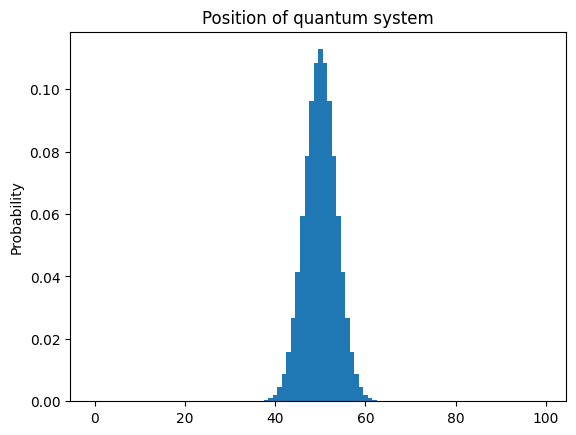

In [26]:
psi = np.array([np.exp(-(x-50)**2/(2*25)) for x in range(100)])

psi = psi/np.linalg.norm(psi)

plot_position(psi)

### 4.2 Second solution: basis of functions

When we form superpositions of quantum states, we always use the same formula:

$$
|\psi\rangle = \sum_i \psi_i|i\rangle
$$

so what if we use a different basis? Instead of the canonical basis $\{|i\rangle\}$ we could use $\{|v_i\rangle\}$, as long as it is orthonormal:

$$
\langle v_i|v_j\rangle = \delta_{ij}
$$

Here is where we can get creative. We can rotate the canonical basis to any other basis by using a unitary matrix $V$:

$$
|v_i\rangle = V|i\rangle
$$

In fact, if we apply $V$ to the canonical basis elements $|i\rangle$, the vectors $|v_i\rangle$ are the columns of $V$, and we know that the columns of a unitary matrix are orthonormal vectors (and so are the rows, by the way).

But we have so many possible unitary matrices to choose from! How do we pick one?
To answer this question we need to know a bit more about Quantum Mechanics, in particular about the physical importance of the energy of a system: physical systems tend to prefer lower energy states so we should make sure we can describe those first, then we can progressively describe higher-energy states until we are satisfied or we run out of resources. Also, if we have a good description of states with a fixed energy, we will see in Lecture 3 that it will become really easy to predict how a system evolves in time.

NOTE: _To those of you who have know about compression of information, the following may feel familiar. When you want to describe something the first thing you do is you look at what occurs more often and you make sure you can describe that well, then you go progressively toward things that occur less often until you are happy._

In [27]:
from INFPHY201 import psi_n

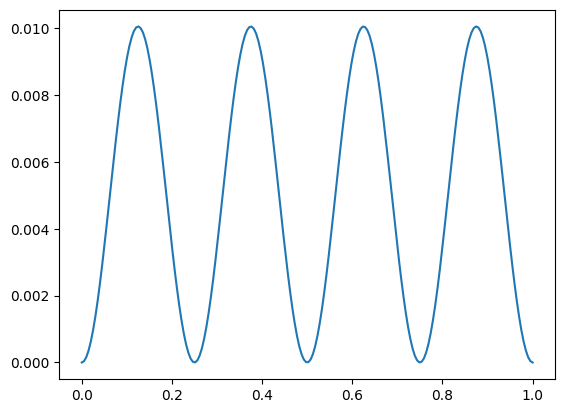

In [28]:
import matplotlib.pyplot as plt

x,y = psi_n(1, 200, 3)
plt.plot(x, np.abs(y)**2); # plotting the probabilities

#### Activity 8: Orthogonality of wave functions (10 min)
- Verify that the elements of the basis of eigenfunctions of the square box are orthonormal (pick a large discretization, say $d=100$)

In [29]:
basis = np.array([psi_n(L=1, dim=100, n=n)[1] for n in range(20)])

In [30]:
basis.shape

(20, 100)

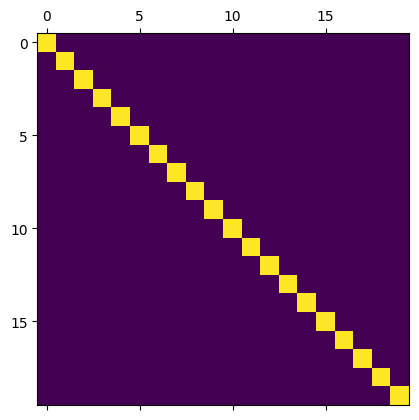

In [31]:
plt.matshow(np.real(basis@np.conj(basis.T)))